<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/CompleteEDA_d3_seaborn_bokeh_visualizations/Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA on a Airbnb open data**



###Load/download the data from Kaggle using kaggle.json API token

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 172MB/s]


###Extract the csv from zipped dataset

In [2]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


###Importing necessary libraries

In [3]:
import pandas as pd
import missingno as msno

###Reading the data into a dataframe

In [5]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
airbnb_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###Visualization to see null values
##-> last_review and reviews_per_month have highest null values.

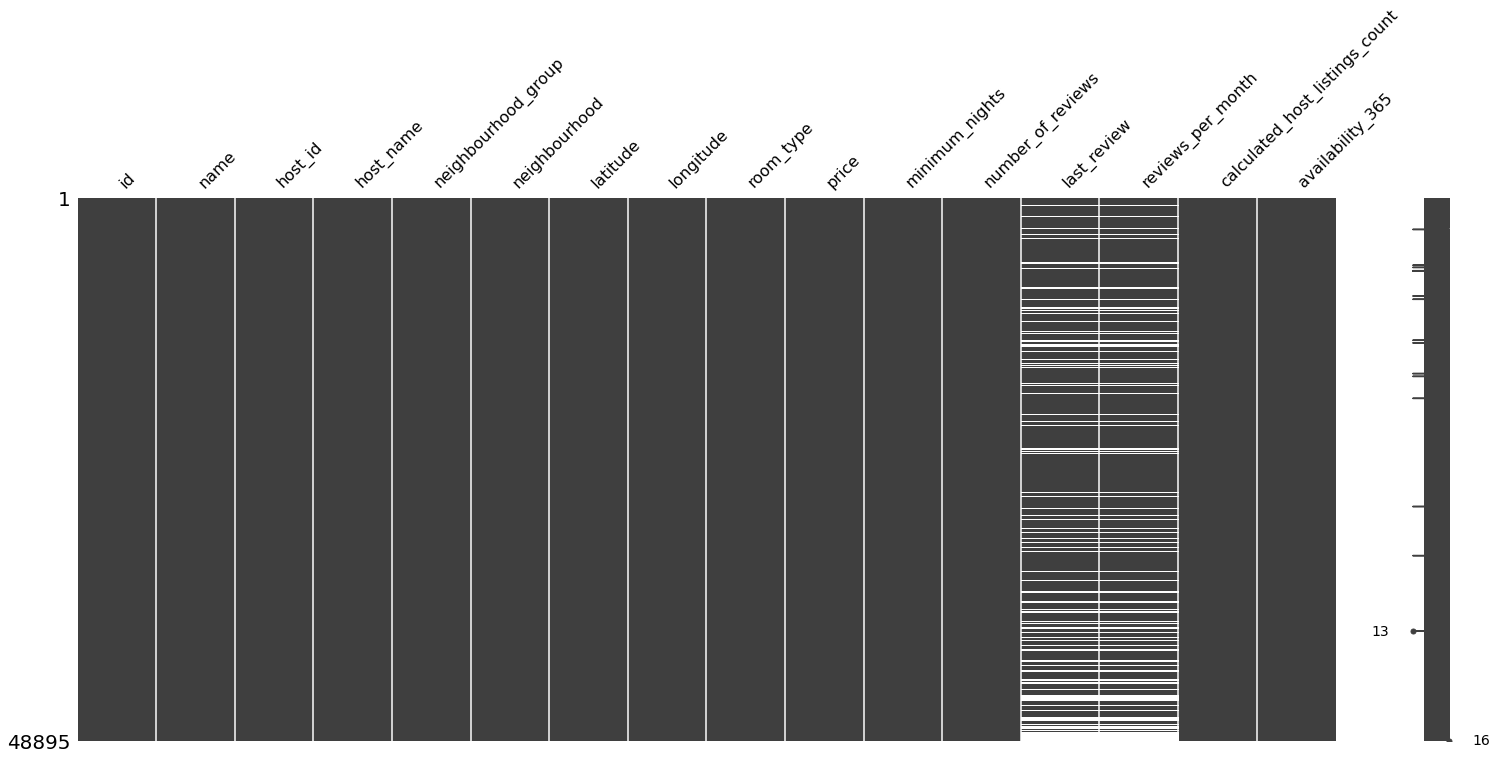

In [8]:
msno.matrix(airbnb_df) 

###check if number of reviews is 0 for every null value in last_review or reviews_per_month

In [9]:
airbnb_df[['number_of_reviews','last_review','reviews_per_month']][airbnb_df.reviews_per_month.isna() & airbnb_df.last_review.isna()]

,number_of_reviews,last_review,reviews_per_month
2,0,NaN,NaN
19,0,NaN,NaN
26,0,NaN,NaN
36,0,NaN,NaN
38,0,NaN,NaN
...,...,...,...
48890,0,NaN,NaN
48891,0,NaN,NaN
48892,0,NaN,NaN
48893,0,NaN,NaN


###checking if there are any duplicates

In [10]:
airbnb_df.duplicated().sum()

0

###Data imputation : Replace nulls with 0 in last_review and reviews_per_month

In [11]:
airbnb_df.fillna({'last_review':0},inplace = True)
airbnb_df.fillna({'reviews_per_month':0},inplace = True)
airbnb_df.isna().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

###Check the categorical variables 

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
airbnb_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
airbnb_df['neighbourhood_group'].unique()



array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb_csv = airbnb_df.to_csv()

In [25]:
airbnb_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

###Prices based on neighborhood group and room_type

In [ ]:
neighborhood_price = airbnb_df.groupby(['neighbourhood_group','room_type']).describe()
neighborhood_price.xs('price',axis = 1)
#DataFrame.xs(key, axis=0, level=None, drop_level=True)[source]

count        mean         std   min  \
neighbourhood_group room_type                                                
Bronx               Entire home/apt    379.0  127.506596   95.027102  28.0   
                    Private room       652.0   66.788344  107.009071   0.0   
                    Shared room         60.0   59.800000  101.798871  20.0   
Brooklyn            Entire home/apt   9559.0  178.327545  226.415825   0.0   
                    Private room     10132.0   76.500099  124.713499   0.0   
                    Shared room        413.0   50.527845   53.444485   0.0   
Manhattan           Entire home/apt  13199.0  249.239109  331.830132   0.0   
                    Private room      7982.0  116.776622  190.191318  10.0   
                    Shared room        480.0   88.977083   92.416534  10.0   
Queens              Entire home/apt   2096.0  147.050573  129.383208  10.0   
                    Private room      3372.0   71.762456  180.506756  10.0   
                    Shared room        198.0   69.020202  171.000607  11.0   
Staten Island       Entire home/apt    176.0  173.846591  394.600216  48.0   
                    Private room       188.0   62.292553   36.138245  20.0   
                    Shared room          9.0   57.444444   45.119594  13.0   

                                       25%    50%     75%      max  
neighbourhood_group room_type                                       
Bronx               Entire home/apt   80.0  100.0  140.00   1000.0  
                    Private room      40.0   53.5   70.00   2500.0  
                    Shared room       28.0   40.0   55.50    800.0  
Brooklyn            Entire home/apt  105.0  145.0  199.00  10000.0  
                    Private room      50.0   65.0   80.00   7500.0  
                    Shared room       30.0   36.0   50.00    725.0  
Manhattan           Entire home/apt  142.5  191.0  259.00  10000.0  
                    Private room      68.0   90.0  120.00   9999.0  
                    Shared room       49.0   69.0   89.25   1000.0  
Queens              Entire home/apt   90.0  120.0  168.25   2600.0  
                    Private room      47.0   60.0   75.00  10000.0  
                    Shared room       30.0   37.0   54.25   1800.0  
Staten Island       Entire home/apt   75.0  100.0  151.25   5000.0  
                    Private room      40.0   50.0   75.00    300.0  
                    Shared room       29.0   30.0   75.00    150.0

### One hot encoding using pandas on neighbourhood_group and room_type

In [ ]:
neighborhoodgroup_encoded = pd.get_dummies(airbnb_df['neighbourhood_group'])
roomtype_encoded = pd.get_dummies(airbnb_df['room_type'])

airbnb_postencoding = pd.concat([airbnb_df,neighborhoodgroup_encoded,roomtype_encoded],axis = 1).drop(['neighbourhood_group','room_type'],axis = 1)

In [ ]:
pd.set_option('display.max_columns',None)
airbnb_postencoding.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0


##**Visualizations using matplotlib, seaborn**

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

##To Visualize where the prices mostly lie on price range

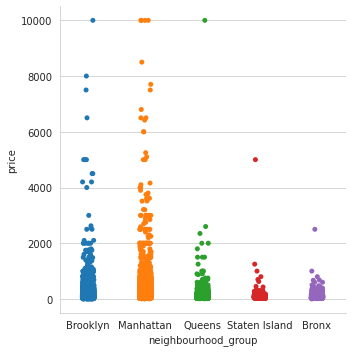

In [ ]:
sns.catplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df)

##The distribution of prices on neighborhood as what pricing is densely found in those regions

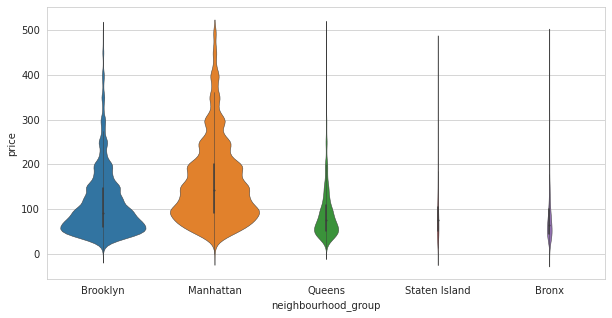

In [ ]:
df1 =airbnb_df[airbnb_df['price']<500]
plt.figure(figsize = (10,5))
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = df1, scale = 'count', linewidth = 0.5)

##Popular neighborhood groups with maximum listings are brooklyn and Manhatten.Brooklyn has highest private room types and Manhatten has highest entire room types.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


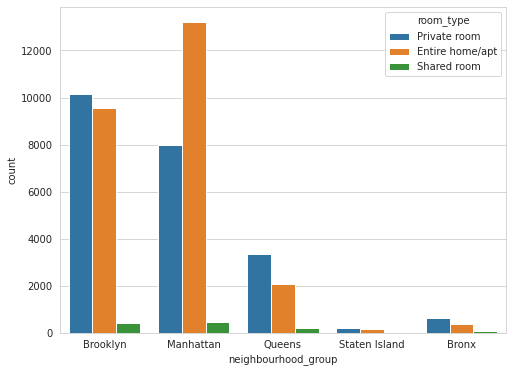

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(airbnb_df['neighbourhood_group'],hue=airbnb_df['room_type'])

##Finding high priced room types -> clearly its entire home/private room and shared room in order

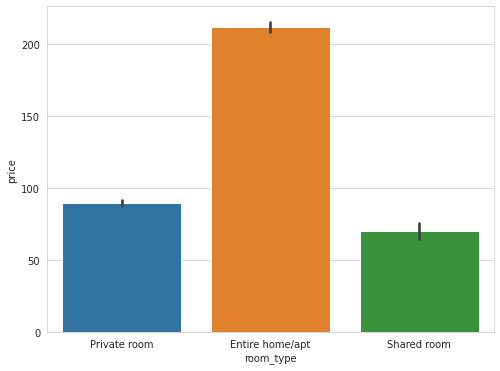

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=airbnb_df, x='room_type', y='price')

##Checking if number of reviews impact the price of the listing-> It is not.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

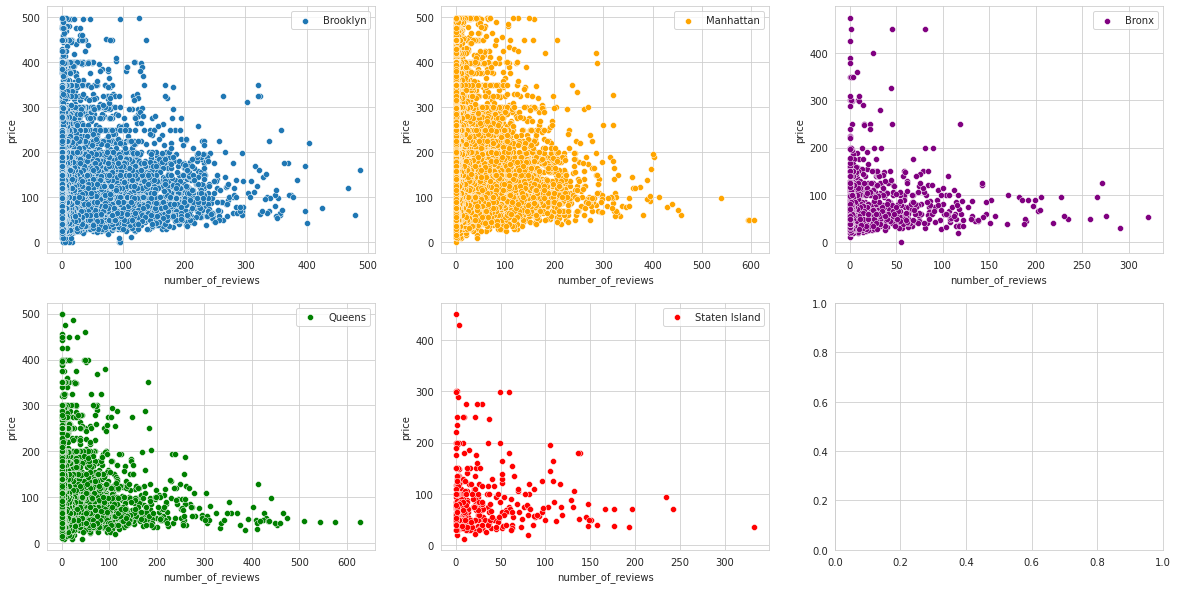

In [ ]:
df2= df1.groupby('neighbourhood_group')
fig, ax = plt.subplots(2,3,figsize =(20,10))
ax = ax.flatten().T
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Brooklyn'),ax = ax[0], label ='Brooklyn')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Manhattan'),ax = ax[1],color = 'orange',label ='Manhattan')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Bronx'),ax = ax[2],color = 'purple',label ='Bronx')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Queens'),ax = ax[3],color = 'g',label ='Queens')
sns.scatterplot('number_of_reviews','price',data = df2.get_group('Staten Island'),ax = ax[4],color = 'r',label ='Staten Island')

##check how many nights are usually booked for a stay - Majority is less than 3 days but also has good bookings for over a month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.XTick at 0x7f53d1725550>,
 [Text(0, 0, '1'),
  Text(0, 0, '5'),
  Text(0, 0, '10'),
  Text(0, 0, '15'),
  Text(0, 0, '20'),
  Text(0, 0, '25'),
  Text(0, 0, '30'),
  Text(0, 0, '35'),
  Text(0, 0, '40')])

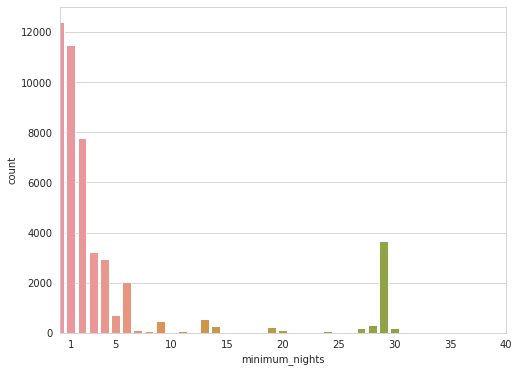

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot('minimum_nights', data = df1)
plt.xlim(0, 40)
tick = [1,5,10,15,20,25,30,35,40]
plt.xticks(tick, tick)

To check which neighborhood has more availability to book -> Its is even across all the neighborhoods

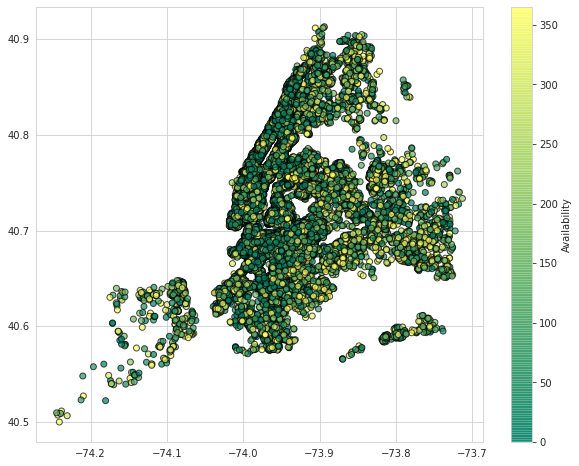

In [ ]:
plt.figure(figsize= (10,8))
plt.scatter(df1.longitude, df1.latitude, c = df1.availability_365, alpha = 0.7,cmap ='summer',edgecolor = 'black')
c_bar = plt.colorbar()
c_bar.set_label('Availability')

# **Using D3 and Javascript for Visualizations** 

In [ ]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from IPython.display import HTML

import IPython.display as dp

##D3 visualization is unable to read the file from drive or even the file when its published on web. Implemented d3 on vscode with a local csv dataset. Have uploaded it seperately in the github. The below cell doesnt run on colab.

In [ ]:
from string import Template
HTML('''
<html lang="en">
<head>
      <meta charset="UTF-8">
      <script src="https://d3js.org/d3.v7.min.js"></script>

      <title>D3 with DS4E</title>
      <style>
          .bar{
              fill: navy;
          }
      </style>
      <script>
   function main(){
  var svg = d3.select("svg"),
  margin = 200,
  width = svg.attr("width") - margin,
  height = svg.attr("height") - margin;
  var xscale = d3.scaleBand().range([0, width]).padding(0.4),
      yscale = d3.scaleLinear().range([height,0]);

  var g = svg.append("g").attr("transform", "translate("+100+","+100+")");
  d3.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRigqMoJPVMst-7pvp_qXRnJ4wpIgV5_w6Zon3rm8oh1L5muIG4H5vZNU6o3hgCKrHhjP_9htyntz7g/pubhtml?gid=184466309&single=true").then(function(data){
      
      xscale.domain(data.map(function(d){return d.neighbourhood_group;}));
      console.log(xscale);
      yscale.domain([0,d3.max(data,function(d){return d.price;})]);
      g.append("g").attr('transform', 'translate(0,'+height+')')
          .call(d3.axisBottom(xscale))
      g.append("g").call(d3.axisLeft(yscale).tickFormat(function(d){
              return "$" + d;
      }).ticks(10));

      g.selectAll(".bar")
            .data(data)
            .enter().append("rect")
            .attr("class","bar")
            .attr("x",function(d){return xscale(d.neighbourhood_group);})
            .attr("y",function(d){return yscale(d.price);})
            .attr("width",xscale.bandwidth())
            .attr("height",function(d){return height - yscale(d.price);});
      });
    }



      </script>
</head>
<body onload="main();">
    <svg width=600 height=600></svg>


</body>
</html>
''')

#Interactive Visualizations using Bokeh

##Install bokeh

In [16]:
!pip install pandas-bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Spectral6
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import curdoc
import pandas_bokeh

In [22]:
output_notebook()

In [26]:
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##Plot different graphs using interactive bokeh on a single layout(dashboard)

##Bargraph to compare the attributes grouped by neighbourhood_group and a 

In [52]:

colors=['#FDE724','#D01C8B','#4DAC26']

p_bar = airbnb_df.groupby(['neighbourhood_group']).count().plot_bokeh(kind="bar",colormap=colors,show_figure=True)




##group neighbourhood_group to show highest rooms available in each group

In [54]:
p_line = airbnb_df.groupby(['neighbourhood_group']).count().plot_bokeh(kind="line",y='room_type',color='#d01c8b',plot_data_points=True,show_figure=True)



In [55]:
# Plot2- Barplot
p_bar = airbnb_df.groupby(['room_type']).count().plot_bokeh(kind="bar",colormap=colors,show_figure=True)




In [62]:

p_scatter = airbnb_df.plot_bokeh(kind="scatter", x="neighbourhood_group", y="availability_365",category="availability_365",colormap=colors,show_figure=True)


##Pie chart based on room_type in each neighbourhood place

In [63]:
#Plot5- Pie chart
p_pie= airbnb_df.groupby(['room_type']).count().plot_bokeh.pie(y='neighbourhood_group',colormap=colors,show_figure=True) 



__x__values_original


##Histogram of the airbnb_df dataset

In [57]:
#Plot6- Histogram
p_hist=airbnb_df.plot_bokeh(kind='hist', histogram_type="stacked",bins=10,colormap=colors, show_figure=True) 